In [2]:
"""
Impoting Required libraries (numpy, pandas, sklearn, pydotplus)

"""
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn import tree
from sklearn import preprocessing
from IPython.display import Image 
from io import StringIO
import pydotplus
import graphviz

In [3]:
"""
Required custom functions

"""

def convert(txt):
    if 'yes' or 'normal' or 'Male' in txt:
        return 1
    if 'pale' or 'dark' or 'Female' in txt:
        return 2
    if 'watery' in txt:
        return 3
    if 'no' in txt:
        return 0

def accuracy_score(matrix):
    tp_sum = 0
    score = 0
    np.array(matrix)
    for i in range(len(matrix)):
        tp_sum += matrix[i][i]
        
    score = tp_sum / np.sum(matrix)
    return score            
            
def plot_tree(clf,feature_name,target_name):
    dot_data = StringIO()  
    tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=feature_name,  
                         class_names=target_name,  
                         filled=True, rounded=True,  
                         special_characters=True)  
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())

In [15]:
"""
Imorting Data

"""

df = pd.read_csv("d_tree_disease_data.csv")

In [17]:
"""
Data Pre-processing

"""

df.fillna(0, inplace=True)

# for column in range(9, 15):
#          df.iloc[:, column] = df.iloc[:, column].apply(convert)

# replacements = {'yes':1, 'normal':1, 'Male':1, 'pale':2, 'dark':2, 'Female':2, 'watery':3, 'no':0}
# df = df.replace(replacements)
feature_data = encoded_df.iloc[:, :-1] # Slicing dataset into feature set.
target_data = encoded_df.iloc[:, -1] # slicing dataset into target set.

enc_feature_data = pd.get_dummies(feature_data) # One-Hot encoding
targets = df['Class'].unique().tolist()
df.head(5)

,Cough,Breathlessness,Tightness_of_chest,Weightloss,Fever,Fever_with_chill,Chest_pain,Abdominal_pain,Abdominal_cramps,Stool,...,Nausea,Vomiting,Headache,Muscle_joint_pain,Rash,Blood_in_cough,Smoke_history,Fatigue,Gender,Disease
0,1,1,0,2.5,100.00,0,0,0,0,1,...,0,0,0,0,0,1,0,1,1,tb
1,1,1,0,2.5,100.00,0,0,0,0,1,...,0,0,0,0,0,1,0,1,2,tb
2,1,1,1,1.9,98.00,0,1,0,0,1,...,0,0,0,0,0,1,14,1,1,tb
3,1,1,1,1.9,98.00,0,1,0,0,1,...,0,0,0,0,0,1,0,1,2,tb
4,1,1,0,2.5,99.68,0,0,0,0,1,...,0,0,0,0,0,1,0,1,1,tb


In [117]:
"""
Defining 'train data' and 'test data' # (if you need to devide the main dataset into train and test data)

"""

train_feature, test_feature, train_target, test_target = train_test_split( enc_feature_data, target_data, test_size = 0.3, random_state = 100)

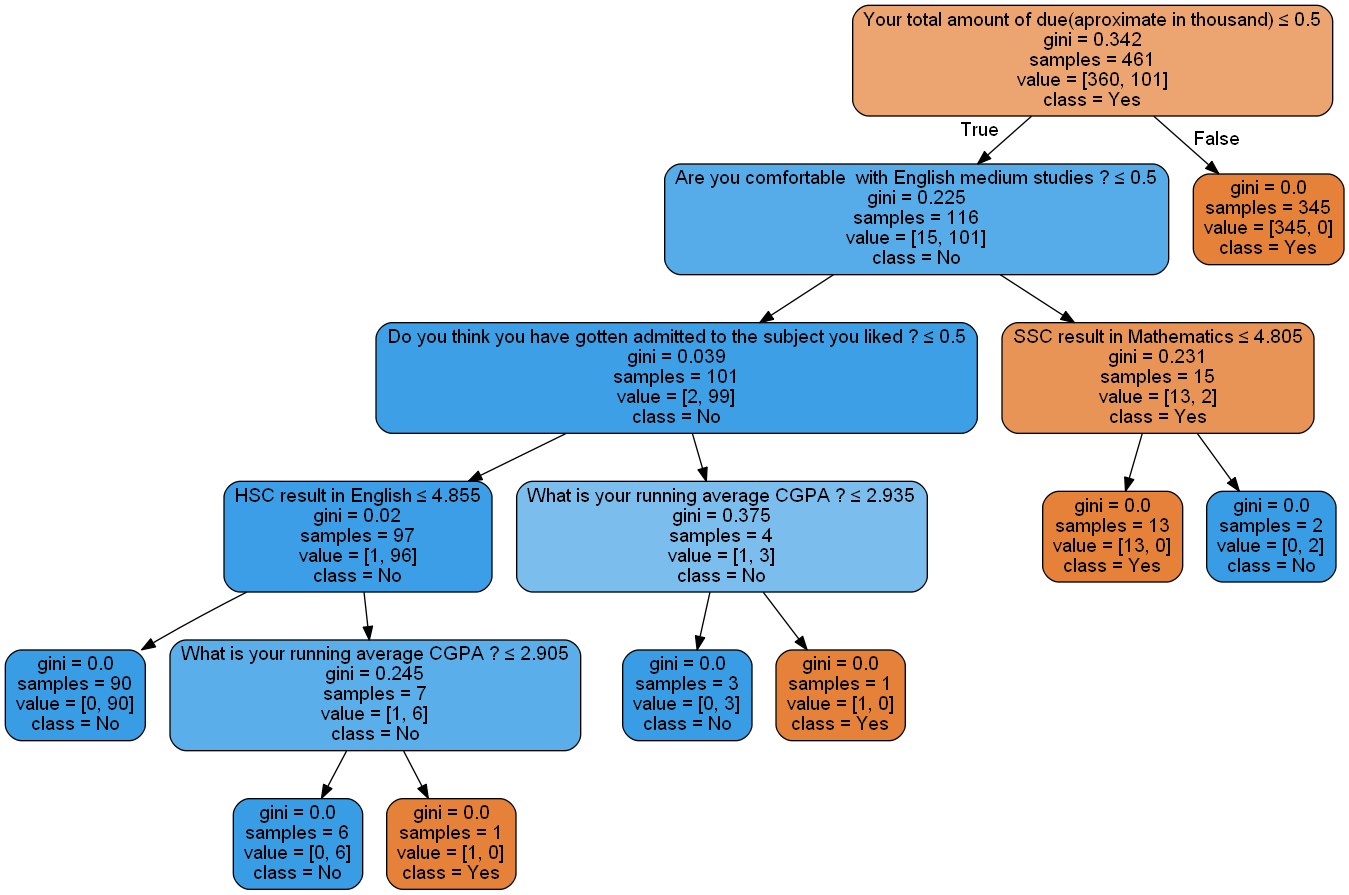

In [118]:
"""
Decision Tree Classifier with gini index

"""
gini_classifier = DecisionTreeClassifier(criterion = "gini")
gini_classifier.fit(train_feature, train_target)

plot_tree(gini_classifier, train_feature.columns, targets)

In [119]:
"""
Prediction and report using set of test data for 'gini index' classifier
 
"""

gini_pred = gini_classifier.predict(test_feature) # prediction using gini classifier

gini_matrix = confusion_matrix(test_target, gini_pred)

print("Confusion Matrix: \n")
print(gini_matrix)
print("\nClassification Report: \n")
print(classification_report(test_target, gini_pred)) 

gini_accuracy = accuracy_score(gini_matrix)*100
print("\nAccuracy score: ", gini_accuracy, "%")

Confusion Matrix: 

[[148   1]
 [  1  48]]

Classification Report: 

             precision    recall  f1-score   support

         No       0.99      0.99      0.99       149
        Yes       0.98      0.98      0.98        49

avg / total       0.99      0.99      0.99       198


Accuracy score:  98.98989898989899 %


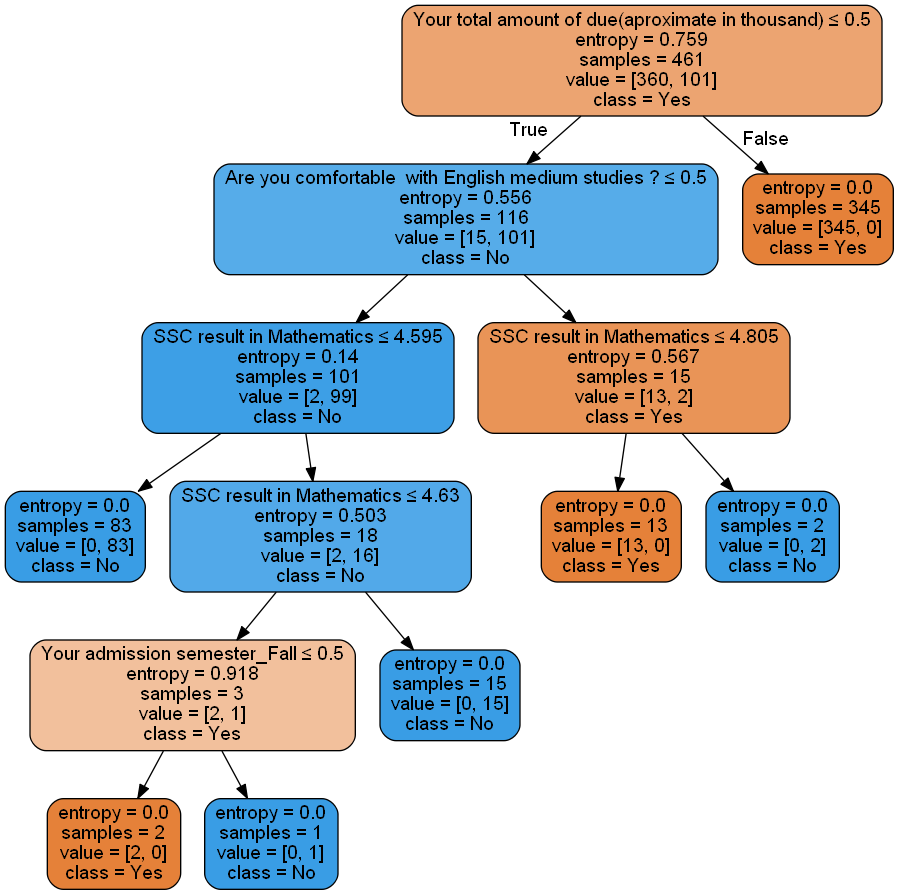

In [120]:
"""
Decision Tree Classifier with entropy gain

"""

entropy_classifier = DecisionTreeClassifier(criterion = "entropy")
entropy_classifier.fit(train_feature, train_target)

plot_tree(entropy_classifier, train_feature.columns,targets)

In [121]:
"""
Prediction and report using set of test data for 'entropy' classifier

"""

entro_pred = entropy_classifier.predict(test_feature) # prediction using entropy classfier

entropy_matrix = confusion_matrix(test_target, entro_pred)

print("Confusion Matrix: \n")
print(confusion_matrix(test_target, entro_pred))  
print("\nClassification Report: \n")
print(classification_report(test_target, entro_pred)) 

entropy_accuracy = accuracy_score(entropy_matrix)*100
print("\nAccuracy score: ", entropy_accuracy, "%")

Confusion Matrix: 

[[146   3]
 [  1  48]]

Classification Report: 

             precision    recall  f1-score   support

         No       0.99      0.98      0.99       149
        Yes       0.94      0.98      0.96        49

avg / total       0.98      0.98      0.98       198


Accuracy score:  97.97979797979798 %


In [122]:
"""
Prediction result
 
"""

for i in range(len(gini_pred)):
    print("Prediction for student " + str(i+1) + " is: " + gini_pred[i])
    
print("----------------------------------")
print ("----------------------------------")
print( "----------------------------------")
    
for i in range(len(entro_pred)):
    print("Prediction for student " + str(i+1) + " is: " + entro_pred[i])

Prediction for student 1 is: No
Prediction for student 2 is: No
Prediction for student 3 is: Yes
Prediction for student 4 is: No
Prediction for student 5 is: No
Prediction for student 6 is: No
Prediction for student 7 is: No
Prediction for student 8 is: Yes
Prediction for student 9 is: No
Prediction for student 10 is: No
Prediction for student 11 is: No
Prediction for student 12 is: No
Prediction for student 13 is: Yes
Prediction for student 14 is: No
Prediction for student 15 is: No
Prediction for student 16 is: No
Prediction for student 17 is: No
Prediction for student 18 is: No
Prediction for student 19 is: No
Prediction for student 20 is: No
Prediction for student 21 is: Yes
Prediction for student 22 is: No
Prediction for student 23 is: No
Prediction for student 24 is: No
Prediction for student 25 is: No
Prediction for student 26 is: No
Prediction for student 27 is: No
Prediction for student 28 is: No
Prediction for student 29 is: Yes
Prediction for student 30 is: Yes
Prediction fo

In [123]:
# from random import uniform

# for i in range(dataframe.shape[1]):
#     for j in range(dataframe.shape[0]):
#         dataframe.iloc[j,i] = float(format(uniform(3,5),'.2f'))

In [124]:
# dframe.to_csv("test_csv_data.csv")